<a href="https://colab.research.google.com/github/hasyed2k23/adsc3610-worksheet3-hasyed2k23-main/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Thu Mar 27 02:41:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


2.6.0+cu124
Using device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

HEALTHCARE, AUTOMOTIVE, RETAIL

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting occurs in machine learning when a model learns not only the underlying patterns in the training data but also irrelevant noise and details, leading to high accuracy on training data but poor performance on unseen data. ​

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.



*   Cross-Validation: This technique involves dividing the dataset into multiple subsets or folds.
* Regularization (L1 and L2): Regularization methods add a penalty to the loss function to constrain the model's complexity.


*   Early Stopping: During training, the model's performance on a validation set is monitored. Training is halted when performance starts to degrade (i.e., when the validation loss begins to increase), preventing the model from overfitting to the training data.







## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations
transform = transforms.Compose([transforms.ToTensor()])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 472kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.33MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.21MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

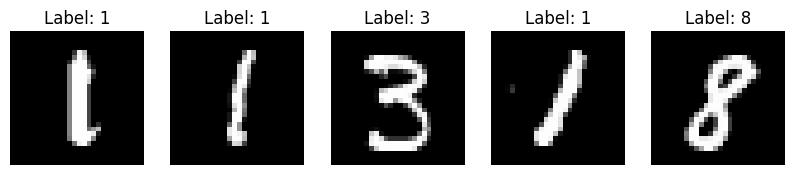

In [ ]:
import matplotlib.pyplot as plt

# Get 5 samples from the training dataset
samples, labels = next(iter(train_loader))

# Plot the samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(samples[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis("off")

plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:


# Define transformations
transform = transforms.Compose([transforms.ToTensor()])

# Load MNIST datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders with batch size of 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the TinyVGG model (modified for MNIST)
class TinyVGG(nn.Module):
    def __init__(self):
        super(TinyVGG, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128*7*7, 256)
        self.fc2 = nn.Linear(256, 10)

        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128*7*7)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders with batch size of 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = TinyVGG()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
import time
import torch

# Function to train the model for one epoch
def train_model(device, model, train_loader, optimizer, criterion, num_epochs=5):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        start_time = time.time()

        for inputs, labels in train_loader:
            # Move inputs and labels to the selected device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Calculate loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_time = time.time() - start_time
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%, Time: {epoch_time:.4f} seconds")

# Training on CPU
print("Training on CPU")
train_model(device='cpu', model=model, train_loader=train_loader, optimizer=optimizer, criterion=criterion, num_epochs=5)

# Training on GPU (if available)
if torch.cuda.is_available():
    print("\nTraining on GPU")
    train_model(device='cuda', model=model, train_loader=train_loader, optimizer=optimizer, criterion=criterion, num_epochs=5)
else:
    print("GPU not available.")


Training on CPU
Epoch 1/5, Loss: 0.1062, Accuracy: 96.67%, Time: 217.5440 seconds
Epoch 2/5, Loss: 0.0356, Accuracy: 98.93%, Time: 226.2566 seconds
Epoch 3/5, Loss: 0.0246, Accuracy: 99.22%, Time: 229.5966 seconds
Epoch 4/5, Loss: 0.0172, Accuracy: 99.47%, Time: 227.9146 seconds
Epoch 5/5, Loss: 0.0136, Accuracy: 99.57%, Time: 225.8525 seconds

Training on GPU


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

Visualizing predictions on CPU


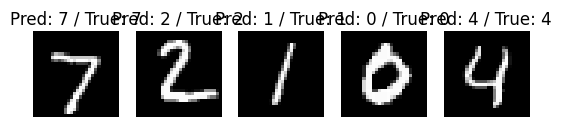

In [ ]:
import matplotlib.pyplot as plt
import torch

# Function to visualize predictions
def visualize_predictions(model, test_loader, device, num_images=5):
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    # Get a batch of test images
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Move images and labels to the selected device
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Visualize the first few images with predicted vs target labels
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"Pred: {predicted[i].item()} / True: {labels[i].item()}")
        plt.axis('off')

    plt.show()

# Visualize predictions on CPU
print("Visualizing predictions on CPU")
visualize_predictions(model=model, test_loader=test_loader, device='cpu', num_images=5)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

Plotting confusion matrix on CPU


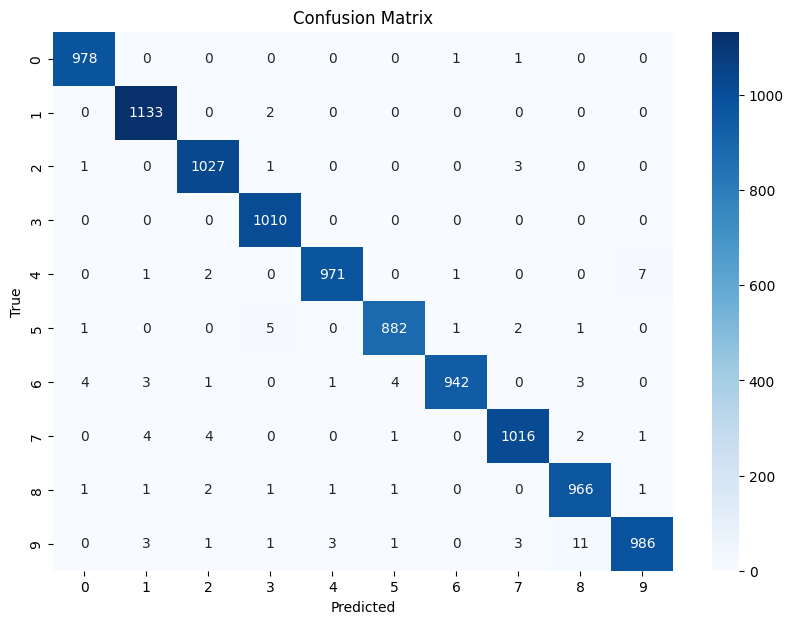

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_loader, device):
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    all_preds = []
    all_labels = []

    # Get predictions for all test data
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix on CPU
print("Plotting confusion matrix on CPU")
plot_confusion_matrix(model=model, test_loader=test_loader, device='cpu')


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
import torch
import torch.nn as nn

# Create a random tensor of shape [1, 3, 64, 64]
input_tensor = torch.randn(1, 3, 64, 64)

# Define Conv2d layers with different kernel sizes
kernel_sizes = [3, 5, 7, 9]  # Example kernel sizes
output_tensors = []

# Pass the input tensor through Conv2d with various kernel sizes
for kernel_size in kernel_sizes:
    conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=kernel_size, stride=1, padding=0)
    output = conv_layer(input_tensor)
    output_tensors.append((kernel_size, output.shape))

    print(f"Kernel Size: {kernel_size}, Output Shape: {output.shape}")


Kernel Size: 3, Output Shape: torch.Size([1, 16, 62, 62])
Kernel Size: 5, Output Shape: torch.Size([1, 16, 60, 60])
Kernel Size: 7, Output Shape: torch.Size([1, 16, 58, 58])
Kernel Size: 9, Output Shape: torch.Size([1, 16, 56, 56])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 24.7MB/s]


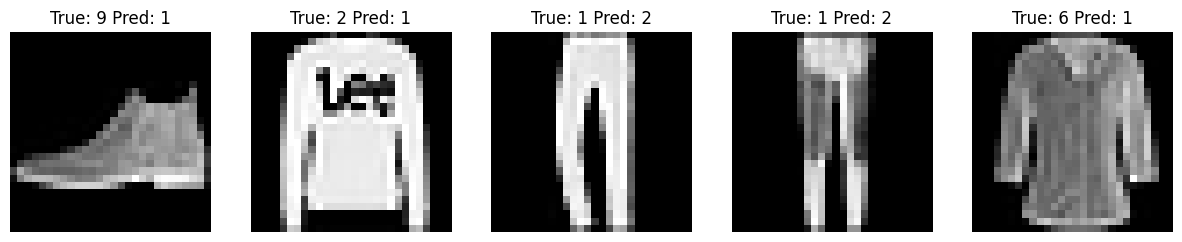

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the TinyVGG model (same architecture as in Exercise 8)
class TinyVGG(nn.Module):
    def __init__(self):
        super(TinyVGG, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128*7*7, 256)
        self.fc2 = nn.Linear(256, 10)

        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128*7*7)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = TinyVGG()

# Load the trained model (use the model saved in the previous step or train again here)
# model.load_state_dict(torch.load('path_to_model.pth'))

# Put the model in evaluation mode
model.eval()

# Make predictions
correct, total = 0, 0
misclassified_images = []
true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Collect misclassified images
        misclassified_mask = predicted != labels
        misclassified_images.append(images[misclassified_mask])
        true_labels.append(labels[misclassified_mask])
        predicted_labels.append(predicted[misclassified_mask])

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Visualize misclassified images
misclassified_images = torch.cat(misclassified_images, dim=0)
true_labels = torch.cat(true_labels, dim=0)
predicted_labels = torch.cat(predicted_labels, dim=0)

# Plot the first 5 misclassified images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(misclassified_images[i][0], cmap='gray')
    axes[i].set_title(f"True: {true_labels[i].item()} Pred: {predicted_labels[i].item()}")
    axes[i].axis('off')

plt.show()
